In [ ]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import hvplot.pandas
import datetime as dt


In [5]:
merge_data=Path("merged_world_data.csv")

merge_data_df=pd.read_csv(merge_data)

In [6]:
aqi=pd.DataFrame(merge_data_df.groupby('AQI')['AQI'].count())
aqi=aqi.rename(columns={'AQI':"Total number of countries"})
aqi['Air Quality']=['Good','Fair','Moderate','Poor','Very Poor']
aqi

,Total number of countries,Air Quality
AQI,,
1,65,Good
2,45,Fair
3,24,Moderate
4,15,Poor
5,17,Very Poor


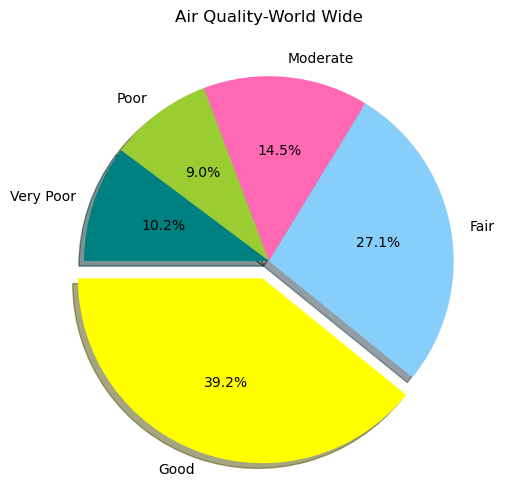

In [17]:
plt.figure(figsize=(6,6))
explode = (0.1, 0, 0, 0,0)
colours=['yellow',"lightskyblue","hotpink","yellowgreen","teal"]
label=aqi['Air Quality']
plt.title("Air Quality-World Wide")
plt.pie(aqi['Total number of countries'],autopct="%1.1f%%",colors=colours, labels=label,explode=explode,\
                                        shadow=True, startangle=180)
plt.savefig("AQ-Worldwide.png")
plt.show()

In [9]:
population_df=merge_data_df.loc[:,['Country','Population','Urban_population','Air pollution(deaths per 100,000)']]


population_df= population_df.assign(Total_Population= lambda x: (population_df['Population']\
                               + population_df['Urban_population'])/10000)

population_df=population_df.rename(columns={'Total_Population':"Total Population(per 100,000)"})

death= population_df['Air pollution(deaths per 100,000)'].mean().astype("int64")

population=population_df['Total Population(per 100,000)'].mean().astype("int64")

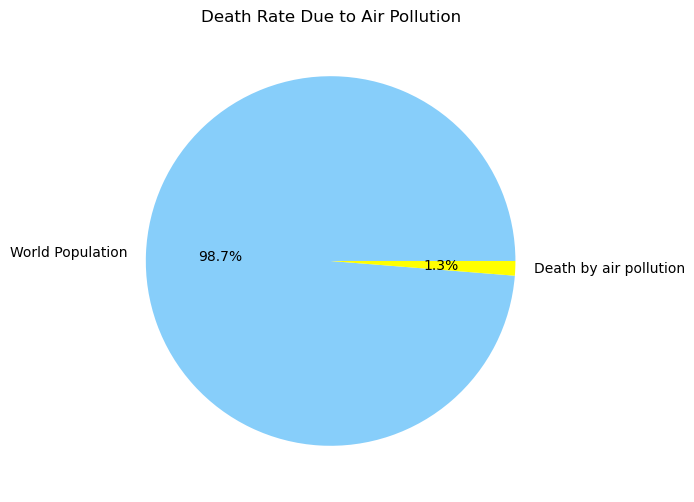

In [16]:
colour=['lightskyblue','yellow']
plt.figure(figsize=(6,6))
plt.title("Death Rate Due to Air Pollution")
x= ["World Population", "Death by air pollution"]
y= [population,death]
plt.pie(y,labels=x,autopct="%1.1f%%",colors=colour)
plt.savefig("death-airpollution.png")
plt.show()


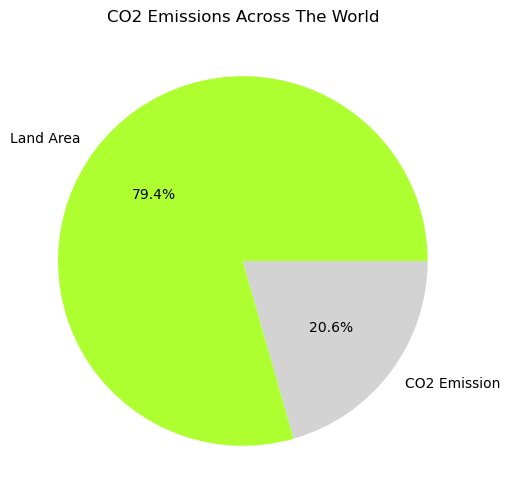

In [18]:
land_area= merge_data_df['Land Area(Km2)'].mean().astype("int64")

co2_emission=merge_data_df['Co2-Emissions'].mean().astype("int64")


colour=['greenyellow','lightgrey']
plt.figure(figsize=(6,6))
plt.title("CO2 Emissions Across The World")
y= [land_area,co2_emission]
x= ['Land Area','CO2 Emission']
plt.pie(y,labels=x,autopct="%1.1f%%",colors=colour)
plt.savefig("co2emission.png")
plt.show()